<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/14_Exam_1_Q31_Q32_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

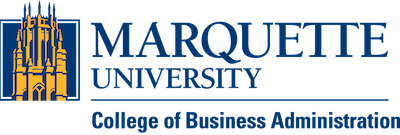

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Exam 1 - Q31 Using Python

Instructor: Dr. Badar Al Lawati

Q31. Parole boards use risk assessment tools to determine an individual’s likelihood of returning to crime. It has been found that older people are less likely to re-offend than younger ones. In addition, once released on parole, women are not likely to re-offend.

A sociologist collects data on 20 individuals who were released on parole two years ago. She notes if the parolee committed another crime over the last two years (Crime equals 1 if crime committed, 0 otherwise), the parolee’s age at the time of&nbsp;release, and the parolee’s sex (Male equals 1 if male, 0 otherwise).

1. Estimate the logistic regression model where crime depends on age and the parolee’s sex.
2. Are the results consistent with the claims of other studies with&nbsp;respect to age and the parolee’s sex?
3. Predict the probability of a 25-year-old male parolee committing&nbsp;another crime; repeat the prediction for a 25-year-old female&nbsp;parolee, and report the difference in outcome (if any).

In [1]:
# Import the excel file into Colab

import pandas as pd
myData = pd.read_excel('/content/Mid_Point_Exam_1_Part_2.xlsx', sheet_name = 'Q31')
myData.head()

,Crime,Age,Male
0,1,25,1
1,0,42,1
2,0,40,0
3,0,35,1
4,1,30,1


In [2]:
# 1. Create the Logistic Regression Model

import statsmodels.formula.api as smf
from statsmodels.api import families

Logistic_Model = smf.glm(
    formula='Crime ~ Age + Male', # <-- add your extra variable here
    family = families.Binomial(),
    data = myData). fit()
print(Logistic_Model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Crime   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.5052
Date:                Wed, 15 Oct 2025   Deviance:                       13.010
Time:                        18:33:06   Pearson chi2:                     12.0
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4750
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0293      5.639      1.601      0.1

2.

In [4]:
# 3. Predict the probability

print(Logistic_Model.predict(pd.DataFrame({'Age':[25], 'Male':[1]})))
print(Logistic_Model.predict(pd.DataFrame({'Age':[25], 'Male':[0]})))

0    0.841031
dtype: float64
0    0.597019
dtype: float64


# Exam 1 - Q32 Using Python

Q32. The accompanying data file contains 200&nbsp;observations with the binary target variable y along with the&nbsp;predictor variables x1, x2, x3, x4, and x5. Using Python:

1. Perform KNN analysis on the data set. What is the optimal value of&nbsp;k?
2. What is the misclassification rate for the optimal k?
3. Report the accuracy, specificity, sensitivity, and precision rates for the test data set&nbsp;
4. Change the cutoff value to 0.2. Report the accuracy, specificity, sensitivity, and precision rates for the test data set.
5. Comment on the performance of the KNN classification model.

In [1]:
# Import the excel file into Colab

import pandas as pd
myData32 = pd.read_excel('/content/Mid_Point_Exam_1_Part_2.xlsx', sheet_name = 'Q32')
myData32.head()

,y,x1,x2,x3,x4,x5
0,1,35,155,93.00,13.55,19
1,0,163,192,95.67,8.61,23
2,0,8,52,93.33,8.39,25
3,1,33,167,84.67,5.82,33
4,0,35,64,64.33,10.58,40


In [2]:
# Split the training / testing partitions
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(myData32.drop(columns=['y'], axis = 1),
myData32['y'], test_size = 0.40, random_state = 321)

In [3]:
len(x_train)

120

In [4]:
len(y_train)

120

In [5]:
# Standardize the variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataScaler = scaler.fit(myData32.drop('y', axis = 1))

In [6]:
x_train_std = dataScaler.transform(x_train)
x_test_std = dataScaler.transform(x_test)

In [7]:
# import the KNN classifier

from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()

In [8]:
paramGrid = {'n_neighbors': range(1, 10 + 1)}

In [9]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(KNN_model, paramGrid, cv=10, scoring='accuracy')

In [10]:
#1. Perfrom the KNN classification

KNN_fit = search.fit(x_train_std, y_train)
pd.DataFrame(KNN_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002903,0.001029,0.005464,0.002537,1,{'n_neighbors': 1},0.583333,0.666667,0.666667,0.833333,0.750000,0.666667,0.750000,0.666667,0.583333,0.833333,0.700000,0.084984,10
1,0.002314,0.000734,0.004491,0.000830,2,{'n_neighbors': 2},0.750000,0.750000,0.666667,0.833333,0.833333,0.833333,0.916667,0.916667,0.833333,0.833333,0.816667,0.072648,1
2,0.004501,0.002283,0.008657,0.004544,3,{'n_neighbors': 3},0.583333,0.750000,0.666667,0.750000,0.750000,0.833333,0.833333,0.833333,0.750000,0.833333,0.758333,0.078617,9
3,0.001403,0.000390,0.002628,0.000519,4,{'n_neighbors': 4},0.666667,0.750000,0.750000,0.833333,0.750000,0.833333,0.916667,0.833333,0.916667,0.833333,0.808333,0.075000,2
4,0.001228,0.000053,0.002536,0.000170,5,{'n_neighbors': 5},0.666667,0.833333,0.750000,0.750000,0.750000,0.833333,0.833333,0.750000,0.916667,0.833333,0.791667,0.067185,5
5,0.001302,0.000053,0.002569,0.000184,6,{'n_neighbors': 6},0.750000,0.750000,0.750000,0.833333,0.750000,0.833333,0.833333,0.833333,0.916667,0.833333,0.808333,0.053359,2
6,0.001243,0.000066,0.002480,0.000186,7,{'n_neighbors': 7},0.750000,0.750000,0.750000,0.750000,0.750000,0.833333,0.833333,0.750000,0.916667,0.833333,0.791667,0.055902,5
7,0.001202,0.000075,0.002375,0.000051,8,{'n_neighbors': 8},0.750000,0.750000,0.750000,0.833333,0.833333,0.833333,0.750000,0.750000,0.833333,0.750000,0.783333,0.040825,7
8,0.001208,0.000119,0.002405,0.000205,9,{'n_neighbors': 9},0.750000,0.750000,0.750000,0.750000,0.750000,0.833333,0.833333,0.750000,0.833333,0.750000,0.775000,0.038188,8
9,0.001255,0.000073,0.002555,0.000105,10,{'n_neighbors': 10},0.750000,0.750000,0.750000,0.750000,0.750000,0.833333,0.916667,0.833333,0.833333,0.833333,0.800000,0.055277,4


In [11]:
# Clean the KNN results

pd.DataFrame(KNN_fit.cv_results_).sort_values('rank_test_score')[['param_n_neighbors', 'mean_test_score', 'rank_test_score']]

,param_n_neighbors,mean_test_score,rank_test_score
1,2,0.816667,1
3,4,0.808333,2
5,6,0.808333,2
9,10,0.800000,4
6,7,0.791667,5
4,5,0.791667,5
7,8,0.783333,7
8,9,0.775000,8
2,3,0.758333,9
0,1,0.700000,10


In [12]:
# Optimal K Value

KNN_fit.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [13]:
# Assess the predections

testPredictions = KNN_fit.predict(x_test_std)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, testPredictions)

array([[58,  5],
       [16,  1]])

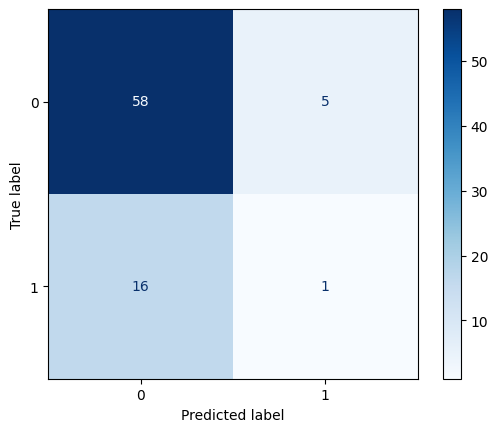

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(KNN_fit, x_test_std, y_test, cmap = plt.cm.Blues);

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, testPredictions)

0.7375

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, testPredictions, target_names = ['Yes = 1', 'No = 0'], digits = 4))

              precision    recall  f1-score   support

     Yes = 1     0.7838    0.9206    0.8467        63
      No = 0     0.1667    0.0588    0.0870        17

    accuracy                         0.7375        80
   macro avg     0.4752    0.4897    0.4668        80
weighted avg     0.6526    0.7375    0.6853        80



In [19]:
# 4. Change the cutoff to 0.2

testPredictionProbs = KNN_fit.predict_proba(x_test_std)
testPredictionProbs[:10,]

array([[1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ]])

In [20]:
import numpy as np
testPredsCustomCutoff = np.where(testPredictionProbs[:, 1] > 0.2, 1, 0)
testPredsCustomCutoff[:10]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [21]:
confusion_matrix(y_test, testPredsCustomCutoff)
accuracy_score(y_test, testPredsCustomCutoff)
print(classification_report(y_test, testPredsCustomCutoff,
target_names = ['Yes = 1', 'No = 0'], digits = 4))

              precision    recall  f1-score   support

     Yes = 1     0.8846    0.7302    0.8000        63
      No = 0     0.3929    0.6471    0.4889        17

    accuracy                         0.7125        80
   macro avg     0.6387    0.6886    0.6444        80
weighted avg     0.7801    0.7125    0.7339        80

